### **Importing Sensored Data**

In [362]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest


### Loading the IOT Sensored Data

In [363]:
#Loading our IOT sensored data
df=pd.read_csv('Irrigation Scheduling.csv')
df

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,2,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,3,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,4,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,5,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24
...,...,...,...,...,...,...,...,...,...,...
4683,4684,29.34,9921.75,-17.49,327,1,0,Dry,08-10-2022,22:06:24
4684,4685,29.31,9921.45,-17.52,328,1,0,Dry,08-10-2022,22:06:24
4685,4686,29.29,9921.48,-17.51,328,1,0,Dry,08-10-2022,22:06:24
4686,4687,29.26,9921.51,-17.51,327,1,0,Dry,08-10-2022,22:06:24


In [364]:
#Checking the class column
df['class']

0       Very Dry
1       Very Dry
2       Very Dry
3       Very Dry
4       Very Dry
          ...   
4683         Dry
4684         Dry
4685         Dry
4686         Dry
4687         Dry
Name: class, Length: 4688, dtype: object

#### **Describing the data**

In [365]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4682.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,-14.291506,243.692406,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,2.649815,76.176855,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,-17.610000,-243.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,-16.340000,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,-13.470000,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,-12.950000,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,116.700000,480.000000,3.000000,1.000000


In [366]:
#Checking the shape of sensored data
df.shape

(4688, 10)

In [367]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4688 non-null   int64  
 1   temperature   4688 non-null   float64
 2   pressure      4688 non-null   float64
 3   altitude      4682 non-null   float64
 4   soilmiosture  4688 non-null   int64  
 5   note          4688 non-null   int64  
 6   status        4688 non-null   int64  
 7   class         4688 non-null   object 
 8   date          4688 non-null   object 
 9   time          4688 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 366.4+ KB


In [368]:
type(df)

pandas.core.frame.DataFrame

In [369]:
#Checking the data types of each column
df.dtypes

id                int64
temperature     float64
pressure        float64
altitude        float64
soilmiosture      int64
note              int64
status            int64
class            object
date             object
time             object
dtype: object

In [370]:
#Checking the number of unique entries in every column
df.nunique()

id              4688
temperature      426
pressure        2593
altitude         555
soilmiosture     262
note               4
status             2
class              4
date               1
time               1
dtype: int64

## **Data Wrangling**

In [371]:
#Dropping the id column
df.drop("id",axis=1,inplace=True)

In [372]:
#Checking whether the column has been removed or not
df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,Very Dry,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,Very Dry,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,Very Dry,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,Very Dry,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,Very Dry,08-10-2022,22:06:24


In [373]:
#Checking for nulls
df.isna().sum()

temperature     0
pressure        0
altitude        6
soilmiosture    0
note            0
status          0
class           0
date            0
time            0
dtype: int64

In [374]:
#Filling missing entries in altitude column with the mean of all altitude
df['altitude'].fillna(int(df['altitude'].mean()),inplace=True)

C:\Users\Emmanuel Tetteh\AppData\Local\Temp\ipykernel_112880\3025070136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['altitude'].fillna(int(df['altitude'].mean()),inplace=True)


In [375]:
#Verifying filled entries
df['altitude'].isna().sum()

0

In [376]:
#Checking uniques in class column
df['class'].value_counts()

class
Very Wet    1842
Wet         1457
Very Dry    1023
Dry          366
Name: count, dtype: int64

In [377]:
#Another method
df.groupby('class').size()

class
Dry          366
Very Dry    1023
Very Wet    1842
Wet         1457
dtype: int64

## **Exploratory Data Analysis**

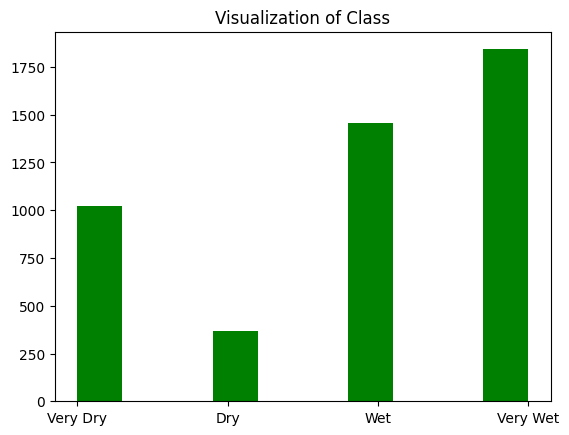

In [378]:
#Visualizing the class column as a histogram

plt.hist(df['class'], color="green")
plt.title("Visualization of Class")
plt.show()


## **Encoding categorical values**

In [379]:
# Checking the class column before encoding 
df.iloc[:,6].values

array(['Very Dry', 'Very Dry', 'Very Dry', ..., 'Dry', 'Dry', 'Dry'],
      dtype=object)

In [380]:
## converting categorical column to numeric using one hot encoder before passing thriugh the models
onehot_encoder=OneHotEncoder()
df['class']=onehot_encoder.fit_transform(df[['class']]).toarray()
df['class'].values

array([0., 0., 0., ..., 1., 1., 1.])

In [381]:
# Now checking data type of column class to see if class was encoded successfully
df['class'].dtype

dtype('float64')

In [382]:
#To display first 5 rows of new data
df.head(5)

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,0.0,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,0.0,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,0.0,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,0.0,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,0.0,08-10-2022,22:06:24


# **Correlation of columns**

In [383]:
#Checking the correlation between the columns
#corr() function tells us how one column can influence the other
data=df.iloc[:,0:7].corr()
data

,temperature,pressure,altitude,soilmiosture,note,status,class
temperature,1.000000,0.069229,0.290575,-0.139279,0.034205,0.028588,-0.027064
pressure,0.069229,1.000000,0.695914,-0.054813,-0.007703,0.003589,-0.003265
altitude,0.290575,0.695914,1.000000,-0.134397,0.076287,0.087809,-0.112191
soilmiosture,-0.139279,-0.054813,-0.134397,1.000000,-0.969905,-0.894602,0.291649
note,0.034205,-0.007703,0.076287,-0.969905,1.000000,0.908939,-0.221729
status,0.028588,0.003589,0.087809,-0.894602,0.908939,1.000000,-0.448475
class,-0.027064,-0.003265,-0.112191,0.291649,-0.221729,-0.448475,1.000000


<Axes: >

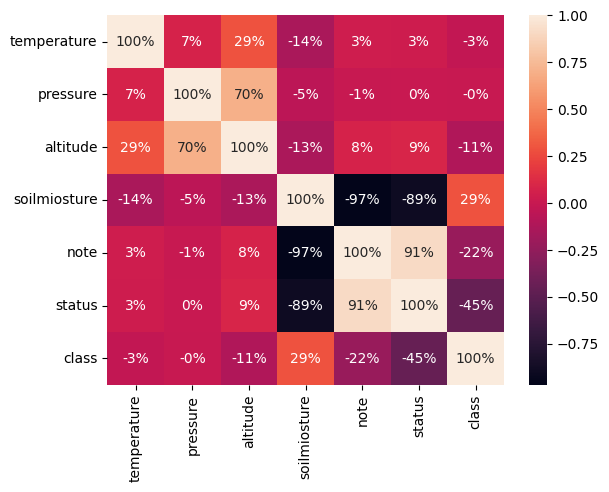

In [384]:
#Visualizing the correlation using seaborn
sns.heatmap(data,annot=True,fmt='.0%')

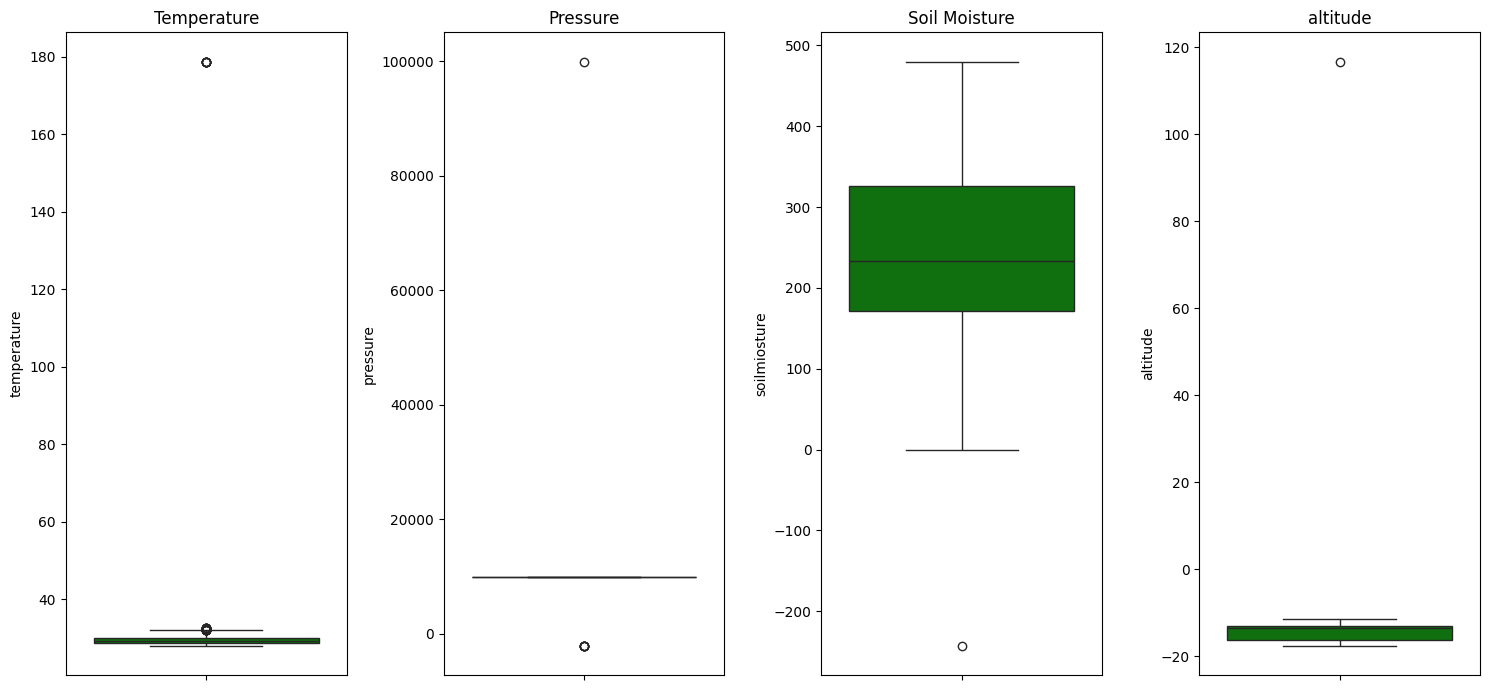

In [385]:
## checking for outliers
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 7))

# Plot boxplots
sns.boxplot(ax=axs[0], color="Green", y=df["temperature"]).set_title('Temperature')
sns.boxplot(ax=axs[1], color= "Green", y=df["pressure"]).set_title('Pressure')
sns.boxplot(ax=axs[2], color="Green", y=df["soilmiosture"]).set_title('Soil Moisture')
sns.boxplot(ax=axs[3], color="Green", y=df["altitude"]).set_title("altitude")

plt.tight_layout()
plt.show()

In [386]:
df.head()

,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,29.10,9984.53,-12.21,377,0,0,0.0,08-10-2022,22:06:24
1,29.08,9984.36,-12.22,379,0,0,0.0,08-10-2022,22:06:24
2,29.06,9984.56,-12.20,376,0,0,0.0,08-10-2022,22:06:24
3,29.05,9984.39,-12.22,377,0,0,0.0,08-10-2022,22:06:24
4,29.03,9984.42,-12.21,379,0,0,0.0,08-10-2022,22:06:24


In [387]:


# normalization using z score (Standardization using StandardScaler)
scaler = StandardScaler()

# create a copy of original df
df_normalized = df.copy()

# Normalize the columns
df_normalized["temperature"] = scaler.fit_transform(df[["temperature"]])
df_normalized["pressure"] = scaler.fit_transform(df[["pressure"]])
df_normalized["soilmiosture"] = scaler.fit_transform(df[["soilmiosture"]])
df_normalized["altitude"] = scaler.fit_transform(df[["altitude"]])

# Print the normalized DataFrame
print(df_normalized)


      temperature  pressure  altitude  soilmiosture  note  status  class  \
0       -0.085430  0.015452  0.785969      1.750162     0       0    0.0   
1       -0.088854  0.015329  0.782192      1.776419     0       0    0.0   
2       -0.092277  0.015473  0.789745      1.737033     0       0    0.0   
3       -0.093989  0.015351  0.782192      1.750162     0       0    0.0   
4       -0.097412  0.015372  0.785969      1.776419     0       0    0.0   
...           ...       ...       ...           ...   ...     ...    ...   
4683    -0.044349 -0.029927 -1.208097      1.093724     1       0    1.0   
4684    -0.049484 -0.030144 -1.219427      1.106853     1       0    1.0   
4685    -0.052908 -0.030123 -1.215650      1.106853     1       0    1.0   
4686    -0.058043 -0.030101 -1.215650      1.093724     1       0    1.0   
4687    -0.054619 -0.029602 -1.192990      1.041209     1       0    1.0   

            date      time  
0     08-10-2022  22:06:24  
1     08-10-2022  22:06:24  


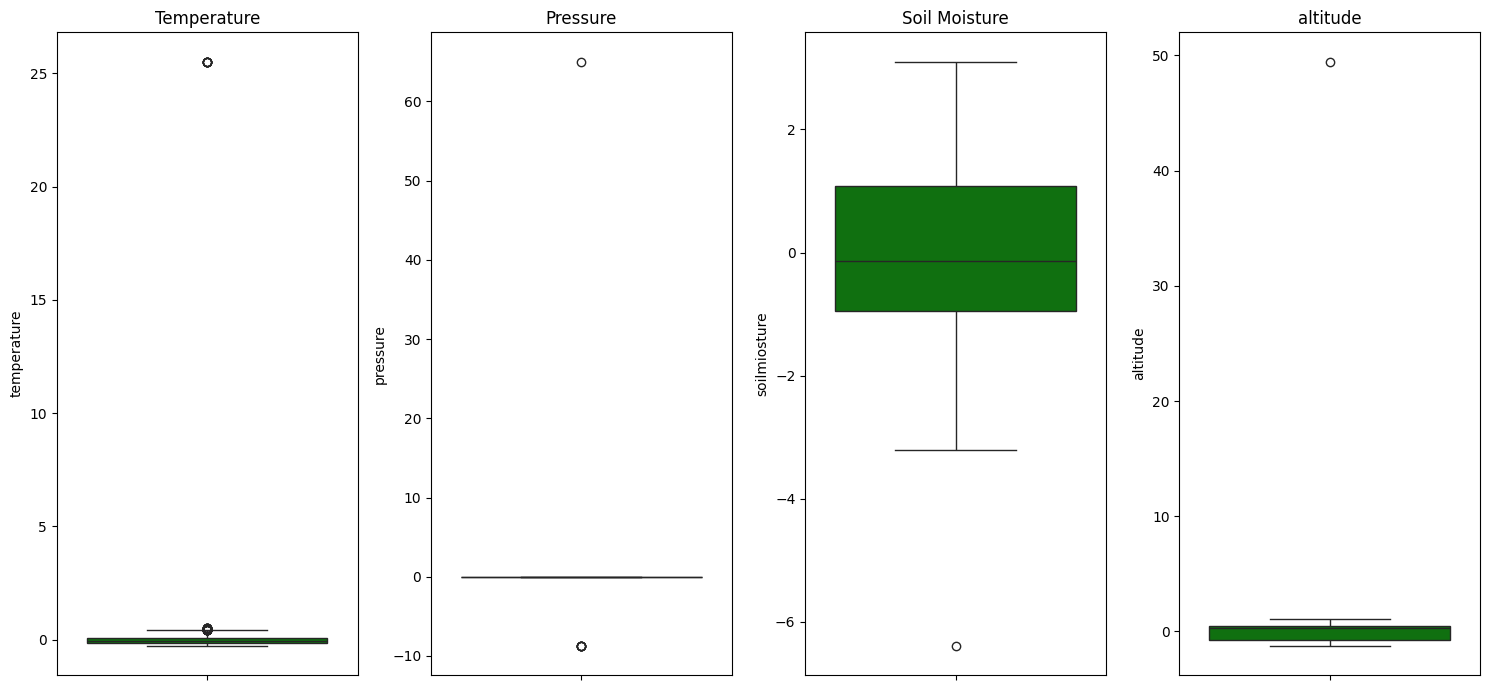

In [388]:
## Creating boxplots to check for data distribution after normalization
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 7))

# Plot boxplots
sns.boxplot(ax=axs[0], color="Green", y=df_normalized["temperature"]).set_title('Temperature')
sns.boxplot(ax=axs[1], color="Green", y=df_normalized["pressure"]).set_title('Pressure')
sns.boxplot(ax=axs[2], color="Green", y=df_normalized["soilmiosture"]).set_title('Soil Moisture')
sns.boxplot(ax=axs[3], color="Green", y=df_normalized["altitude"]).set_title("altitude")

plt.tight_layout()
plt.show()

In [389]:
#Checking for the number of outliers in the distribution
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1_temp = df_normalized["temperature"].quantile(0.25)
Q3_temp = df_normalized["temperature"].quantile(0.75)
Q1_pressure = df_normalized["pressure"].quantile(0.25)
Q3_pressure = df_normalized["pressure"].quantile(0.75)
Q1_soil = df_normalized["soilmiosture"].quantile(0.25)
Q3_soil = df_normalized["soilmiosture"].quantile(0.75)
Q1_altitude = df_normalized["altitude"].quantile(0.25)
Q3_altitude = df_normalized["altitude"].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR_temp = Q3_temp - Q1_temp
IQR_pressure = Q3_pressure - Q1_pressure
IQR_soil = Q3_soil - Q1_soil
IQR_altitude = Q3_altitude - Q1_altitude

# Calculate the number of outliers for each column
outliers_temp = ((df_normalized["temperature"] < (Q1_temp - 1.5 * IQR_temp)) | (df_normalized["temperature"] > (Q3_temp + 1.5 * IQR_temp))).sum()
outliers_pressure = ((df_normalized["pressure"] < (Q1_pressure - 1.5 * IQR_pressure)) | (df_normalized["pressure"] > (Q3_pressure + 1.5 * IQR_pressure))).sum()
outliers_soil = ((df_normalized["soilmiosture"] < (Q1_soil - 1.5 * IQR_soil)) | (df_normalized["soilmiosture"] > (Q3_soil + 1.5 * IQR_soil))).sum()
outliers_altitude = ((df_normalized["altitude"] < (Q1_altitude - 1.5 * IQR_altitude)) | (df_normalized["altitude"] > (Q3_altitude + 1.5 * IQR_altitude))).sum()

print("Number of outliers in temperature:", outliers_temp)
print("Number of outliers in pressure:", outliers_pressure)
print("Number of outliers in soilmiosture:", outliers_soil)
print("Number of outliers in altitude:", outliers_altitude)


Number of outliers in temperature: 46
Number of outliers in pressure: 7
Number of outliers in soilmiosture: 1
Number of outliers in altitude: 1


In [390]:
def outliers_check():
    Q1_temp = df_normalized["temperature"].quantile(0.25)
    Q3_temp = df_normalized["temperature"].quantile(0.75)
    Q1_pressure = df_normalized["pressure"].quantile(0.25)
    Q3_pressure = df_normalized["pressure"].quantile(0.75)
    Q1_soil = df_normalized["soilmiosture"].quantile(0.25)
    Q3_soil = df_normalized["soilmiosture"].quantile(0.75)
    Q1_altitude = df_normalized["altitude"].quantile(0.25)
    Q3_altitude = df_normalized["altitude"].quantile(0.75)

    # Calculate the Interquartile Range (IQR) for each column
    IQR_temp = Q3_temp - Q1_temp
    IQR_pressure = Q3_pressure - Q1_pressure
    IQR_soil = Q3_soil - Q1_soil
    IQR_altitude = Q3_altitude - Q1_altitude

    # Calculate the number of outliers for each column
    outliers_temp = ((df_normalized["temperature"] < (Q1_temp - 1.5 * IQR_temp)) | (df_normalized["temperature"] > (Q3_temp + 1.5 * IQR_temp))).sum()
    outliers_pressure = ((df_normalized["pressure"] < (Q1_pressure - 1.5 * IQR_pressure)) | (df_normalized["pressure"] > (Q3_pressure + 1.5 * IQR_pressure))).sum()
    outliers_soil = ((df_normalized["soilmiosture"] < (Q1_soil - 1.5 * IQR_soil)) | (df_normalized["soilmiosture"] > (Q3_soil + 1.5 * IQR_soil))).sum()
    outliers_altitude = ((df_normalized["altitude"] < (Q1_altitude - 1.5 * IQR_altitude)) | (df_normalized["altitude"] > (Q3_altitude + 1.5 * IQR_altitude))).sum()

    print("Number of outliers in temperature:", outliers_temp)
    print("Number of outliers in pressure:", outliers_pressure)
    print("Number of outliers in soilmiosture:", outliers_soil)
    print("Number of outliers in altitude:", outliers_altitude)
    return outliers_temp,outliers_pressure, outliers_soil, outliers_altitude


In [391]:
outliers_temp, outliers_pressure, outliers_soil, outliers_altitude = outliers_check()



Number of outliers in temperature: 46
Number of outliers in pressure: 7
Number of outliers in soilmiosture: 1
Number of outliers in altitude: 1


In [392]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1_temp = df_normalized["temperature"].quantile(0.25)
Q3_temp = df_normalized["temperature"].quantile(0.75)
Q1_pressure = df_normalized["pressure"].quantile(0.25)
Q3_pressure = df_normalized["pressure"].quantile(0.75)
Q1_soil = df_normalized["soilmiosture"].quantile(0.25)
Q3_soil = df_normalized["soilmiosture"].quantile(0.75)
Q1_altitude = df_normalized["altitude"].quantile(0.25)
Q3_altitude = df_normalized["altitude"].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR_temp = Q3_temp - Q1_temp
IQR_pressure = Q3_pressure - Q1_pressure
IQR_soil = Q3_soil - Q1_soil
IQR_altitude = Q3_altitude - Q1_altitude

# Define the upper and lower bounds for outliers
upper_bound_temp = Q3_temp + 1.5 * IQR_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_pressure = Q3_pressure + 1.5 * IQR_pressure
lower_bound_pressure = Q1_pressure - 1.5 * IQR_pressure
upper_bound_soil = Q3_soil + 1.5 * IQR_soil
lower_bound_soil = Q1_soil - 1.5 * IQR_soil
upper_bound_altitude = Q3_altitude + 1.5 * IQR_altitude
lower_bound_altitude = Q1_altitude - 1.5 * IQR_altitude

# Replace outliers with the highest and lowest values of the distribution
df_normalized["temperature"] = df_normalized["temperature"].clip(lower=lower_bound_temp, upper=upper_bound_temp)
df_normalized["pressure"] = df_normalized["pressure"].clip(lower=lower_bound_pressure, upper=upper_bound_pressure)
df_normalized["soilmiosture"] = df_normalized["soilmiosture"].clip(lower=lower_bound_soil, upper=upper_bound_soil)
df_normalized["altitude"] = df_normalized["altitude"].clip(lower=lower_bound_altitude, upper=upper_bound_altitude)

# Print the DataFrame with outliers replaced
print(df_normalized)


      temperature  pressure  altitude  soilmiosture  note  status  class  \
0       -0.085430  0.015452  0.785969      1.750162     0       0    0.0   
1       -0.088854  0.015329  0.782192      1.776419     0       0    0.0   
2       -0.092277  0.015473  0.789745      1.737033     0       0    0.0   
3       -0.093989  0.015351  0.782192      1.750162     0       0    0.0   
4       -0.097412  0.015372  0.785969      1.776419     0       0    0.0   
...           ...       ...       ...           ...   ...     ...    ...   
4683    -0.044349 -0.029927 -1.208097      1.093724     1       0    1.0   
4684    -0.049484 -0.030144 -1.219427      1.106853     1       0    1.0   
4685    -0.052908 -0.030123 -1.215650      1.106853     1       0    1.0   
4686    -0.058043 -0.030101 -1.215650      1.093724     1       0    1.0   
4687    -0.054619 -0.029602 -1.192990      1.041209     1       0    1.0   

            date      time  
0     08-10-2022  22:06:24  
1     08-10-2022  22:06:24  


In [393]:
#Checking if outliers were properly redistributed
# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1_temp = df_normalized["temperature"].quantile(0.25)
Q3_temp = df_normalized["temperature"].quantile(0.75)
Q1_pressure = df_normalized["pressure"].quantile(0.25)
Q3_pressure = df_normalized["pressure"].quantile(0.75)
Q1_soil = df_normalized["soilmiosture"].quantile(0.25)
Q3_soil = df_normalized["soilmiosture"].quantile(0.75)
Q1_altitude = df_normalized["altitude"].quantile(0.25)
Q3_altitude = df_normalized["altitude"].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each column
IQR_temp = Q3_temp - Q1_temp
IQR_pressure = Q3_pressure - Q1_pressure
IQR_soil = Q3_soil - Q1_soil
IQR_altitude = Q3_altitude - Q1_altitude

# Calculate the number of outliers for each column
outliers_temp = ((df_normalized["temperature"] < (Q1_temp - 1.5 * IQR_temp)) | (df_normalized["temperature"] > (Q3_temp + 1.5 * IQR_temp))).sum()
outliers_pressure = ((df_normalized["pressure"] < (Q1_pressure - 1.5 * IQR_pressure)) | (df_normalized["pressure"] > (Q3_pressure + 1.5 * IQR_pressure))).sum()
outliers_soil = ((df_normalized["soilmiosture"] < (Q1_soil - 1.5 * IQR_soil)) | (df_normalized["soilmiosture"] > (Q3_soil + 1.5 * IQR_soil))).sum()
outliers_altitude = ((df_normalized["altitude"] < (Q1_altitude - 1.5 * IQR_altitude)) | (df_normalized["altitude"] > (Q3_altitude + 1.5 * IQR_altitude))).sum()

print("Number of outliers in temperature:", outliers_temp)
print("Number of outliers in pressure:", outliers_pressure)
print("Number of outliers in soilmiosture:", outliers_soil)
print("Number of outliers in altitude:", outliers_altitude)


Number of outliers in temperature: 0
Number of outliers in pressure: 0
Number of outliers in soilmiosture: 0
Number of outliers in altitude: 0


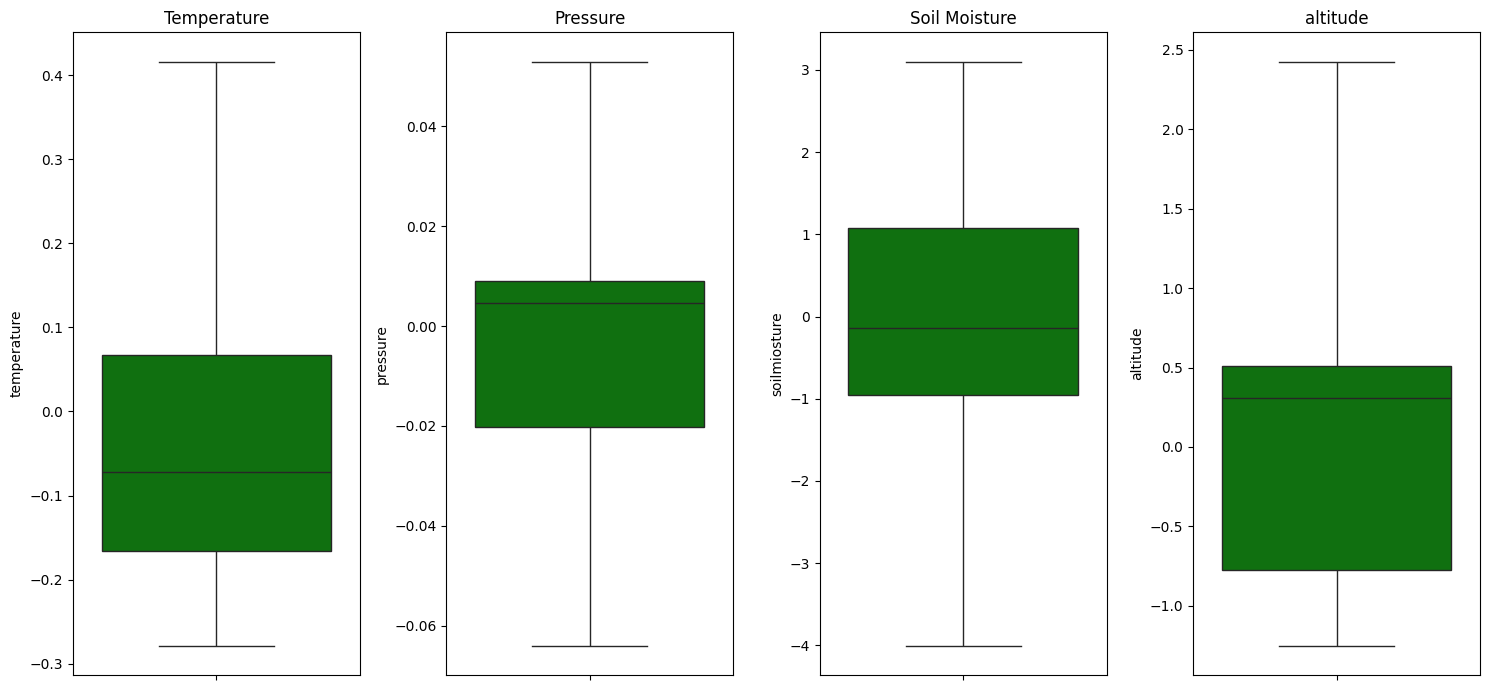

In [394]:
## Creating boxplots to check for data distribution after normalization
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 7))

# Plot boxplots
sns.boxplot(ax=axs[0], color="Green", y=df_normalized["temperature"]).set_title('Temperature')
sns.boxplot(ax=axs[1], color="Green", y=df_normalized["pressure"]).set_title('Pressure')
sns.boxplot(ax=axs[2], color="Green", y=df_normalized["soilmiosture"]).set_title('Soil Moisture')
sns.boxplot(ax=axs[3], color="Green", y=df_normalized["altitude"]).set_title("altitude")

plt.tight_layout()
plt.show()

Hence there are no more outliers in our data

# **Machine Learning**

In [395]:
#Dividing sensored data into features and target
X=df_normalized.iloc[:,0:4].values  
Y=df_normalized.iloc[:,6].values   

In [396]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [425]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [426]:
X_train

array([[-0.68755094,  1.21968095,  1.22715272, -0.13711335],
       [-1.21103869, -0.57436073, -0.58393239,  1.28316896],
       [ 0.59445986,  0.39676776,  0.39798123, -1.00506366],
       ...,
       [-1.2644558 ,  0.88869708,  0.89439311, -0.95246061],
       [-0.52729959,  0.14943916,  0.14704775,  1.25686743],
       [ 0.35942455,  0.1262521 ,  0.11977237, -1.04451594]])

In [427]:
X_test

array([[-0.42046536,  0.65228003,  0.65436978,  1.6513903 ],
       [-0.35636482,  0.47951373,  0.47980736,  1.1648121 ],
       [ 1.25683211, -1.51275456, -1.53311555, -1.00506366],
       ...,
       [ 0.32737428,  0.44586976,  0.44707691,  1.19111362],
       [-1.32855634, -1.34317079, -1.3640082 ,  1.059606  ],
       [-1.27513923,  0.88051342,  0.88348296, -0.92615908]])

In [428]:
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [429]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0.

**Model 1: Logistic Regression**

In [430]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [431]:
# prediction of this model 
pred1=model1.predict(X_test)

In [432]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred1)

0.9093816631130064

In [433]:
# Predict probabilities for the test set
probabilities = model1.predict_proba(X_test)

# Stack probabilities and pred1 arrays horizontally
side_by_side = np.hstack((probabilities, pred1.reshape(-1, 1)))

# Print the stacked arrays
# This tells us the confidence level of the predictions we have made
print(side_by_side[:10])

[[0.83492781 0.16507219 0.        ]
 [0.89164807 0.10835193 0.        ]
 [0.98159465 0.01840535 0.        ]
 [0.96706073 0.03293927 0.        ]
 [0.94160049 0.05839951 0.        ]
 [0.99383919 0.00616081 0.        ]
 [0.97981025 0.02018975 0.        ]
 [0.9767229  0.0232771  0.        ]
 [0.727589   0.272411   0.        ]
 [0.98915559 0.01084441 0.        ]]


In [434]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred1))

[[853   0]
 [ 85   0]]


In [435]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages

Using GridSearchCV to optimize LogisticRegressor model for better performance

In [436]:
# paramgrid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2', None]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


Best hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy on test set: 0.9093816631130064


**Model 2: Gaussian Naive Bayes Classifier**

In [437]:
#Fitting the Gaussian Naive Bayes Classifier model on X and Y
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,Y_train) 

GaussianNB()

In [438]:
#prediction of this model
pred2=model2.predict(X_test)

In [439]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred2)

0.9339019189765458

In [440]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred2))

[[829  24]
 [ 38  47]]


In [441]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       853
         1.0       0.66      0.55      0.60        85

    accuracy                           0.93       938
   macro avg       0.81      0.76      0.78       938
weighted avg       0.93      0.93      0.93       938



In [455]:


# Using Gridsearchcv on GaussianNB
# Using the pipeline for preprocessing, feature_selection, and gaussianNB
pipeline = Pipeline([
    ('preprocessing', StandardScaler()),  # Preprocessing step
    ('feature_selection', SelectKBest()),  # Feature selection step
    ('classifier', GaussianNB())  # Gaussian Naive Bayes classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'preprocessing': [StandardScaler(), None],  # Trying with and without preprocessing
    'feature_selection__k': [1, 2, 3, 4],  # Trying different numbers of features
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best parameters: {'feature_selection__k': 2, 'preprocessing': StandardScaler()}
Accuracy on test set: 0.9498933901918977


**Model 3: Support Vector Classifier**

In [442]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(X_train,Y_train) 

SVC(kernel='linear')

In [443]:
# prediction of this model 
pred3=model3.predict(X_test)

In [444]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred3))

0.9093816631130064


In [445]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred3))

[[853   0]
 [ 85   0]]


In [446]:
#Classification report

print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages

Using GridSearchCV to optimize SVC Model model for better performance

In [447]:
## using gridsearch to obtain the best hyperparameters for the SVC model
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy on test set: 0.976545842217484


In [448]:
## using new hyperparameters obtained with gridsearchcv
model3_gridscv=SVC(C=1.0, kernel='rbf', gamma=1.0)
model3_gridscv.fit(X_train,Y_train) 

SVC(gamma=1.0)

In [449]:
pred4 = model3_gridscv.predict(X_test)

In [450]:
## accuracy score of SVC model with gridsearchcv
accuracy_score(Y_test, pred4)

0.976545842217484

In [451]:
## confusion matrix
print(confusion_matrix(Y_test,pred4))

[[839  14]
 [  8  77]]


In [452]:
## classification report of SVC model with gridsearchcv optimization technique
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       853
         1.0       0.00      0.00      0.00        85

    accuracy                           0.91       938
   macro avg       0.45      0.50      0.48       938
weighted avg       0.83      0.91      0.87       938



C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Emmanuel Tetteh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages